# WeatherPy
HW#6
Due: December 23, 2017

In this exercise I utilized Python libraries - requests, citipy, pandas, numpy, matplotlib.pyplot, datetime - JSON traversals, and the OpenWeatherMap API to answer a fundamental question: "What's the weather like as we approach the equator?" Weather data were collected for over five hundred randomly selected cities across the world.

## Three observable trends based on the data below

1. Weather data collected today (2017/12/22) from over 548 cities around the world, indicate that temperatures are higher for cities at/near the equator (ranging from 50 to 100F), with temperatures dropping off at latitudes lower than -35 degrees and higher than +20 degrees. Cities +60 degrees north of the equator present temperatures as low as -50F. Notice that all plots are skewed with more data points in the northern hemisphere (>0 degrees latitude), because 68% of Earth's dry land is located in the northern hemisphere, whereas the remaining 32% is located in the southern hemisphere. Note also that dry land masses are primarily situated between -60 and +80 degrees latitude.

2. There appears to be no correlation between proximity to the equator and percent humidity, as the majority of cities fell within a 20 to 100% humidity range, independent of their latitude. The only exceptions were a few cities with humidity at 0% in latitudes ranging from +60 to +70 degrees. There also appears to be no correlation between proximity to the equator and cloudiness, as cloud cover varies from 0 to 100% for cities at/near the equator.

3. Wind speed appears to peak between +5 and +20 degrees north of the equator, but it is not clear to me if this is actually a real pattern, as wind speed also peaks at the the lowest (-40 degrees) and highest latitudes (+65 degrees). A larger sample size might helps us determine if there really is a positive or negative correlation between proximity to the equator and wind speed, or not. 

In [10]:
#Dependencies
from citipy import citipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from datetime import datetime

## Generate Cities List

In [11]:
#Create a list of 500 lat, lng combinations and run these values in a loop to get city names with citipy
lats=np.random.uniform(low=-90, high=90, size=70)
lngs=np.random.uniform(low=-180, high=180, size=70)
#print(lats)
#print(lngs)

# #Select 500 cities using citipy library
city_list =[]
for lat in lats:
    for lng in lngs:
        city = citipy.nearest_city(lat, lng)
        if (city.city_name + "," + city.country_code) not in city_list: 
            city_list.append(city.city_name + "," + city.country_code)
#print(city_list)
print(len(city_list))

#Convert list into a dataframe
city_list_df=pd.DataFrame(city_list)
city_list_df=city_list_df.rename(columns = {0: 'City_Country'})
#city_list_df.head()

967


## Perform API Calls

In [12]:
filename = 'apikey.txt'

In [13]:
def get_file_contents(filename):
    """ Given a filename,
        return the contents of that file
    """
    try:
        with open(filename, 'r') as f:
            # It's assumed our file contains a single line, with the API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

In [9]:
# Save config information for OpenWeatherMap 
api_key = get_file_contents(filename)
#print("Our API key is: %s" % (api_key))

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"

# Create blank columns for necessary fields
# city_list_df["Temperature (F)"] = ""
# city_list_df["Humidity (%)"] = ""
# city_list_df["Cloudiness (%)"] = ""
# city_list_df["Wind Speed (mph)"] = ""
# city_list_df["Lat"]= ""
# city_list_df["Lng"]= ""

#Counter
row_count =0

#Loop through and grab data of interest - temp, humidity, cloudiness, and wind speed
for index, row in city_list_df.iterrows():
    
    # Build partial query URL
    #query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + (row["City_Country"])
    query_url= "http://api.openweathermap.org/data/2.5/weather?q=%s&units=%s&mode=json&APPID=%s" % (row["City_Country"], units, api_key) 
        
    #Print log to ensure loop is working correctly
    print("Processing record #" + str(row_count) + " " + row["City_Country"])
    print(query_url)
    row_count += 1

    #Run requests to grab the JSON at the requested URL
    selected_cities = requests.get(query_url).json()
    #print(selected_cities)
    #print(json.dumps(selected_cities, indent=4, sort_keys=True))
    
    #Append the parameters of interest to the appropriate columns
    #Use try/except to skip any cities which return an error message
    try: 
        temp = selected_cities["main"]["temp"]
        humid = selected_cities["main"]["humidity"]
        cloud= selected_cities ["clouds"]["all"]
        wind = selected_cities ["wind"]["speed"]
        lat = selected_cities ["coord"]["lat"]
        lng = selected_cities ["coord"]["lon"]
    
        
        city_list_df.set_value(index, "Temperature (F)", temp)
        city_list_df.set_value(index, "Humidity (%)", humid)
        city_list_df.set_value(index, "Cloudiness (%)", cloud)
        city_list_df.set_value(index, "Wind Speed (mph)", wind) 
        city_list_df.set_value(index, "Lat", lat)
        city_list_df.set_value(index, "Lng", lng)
          
    except:
        print("Error with city data. Skipping")
        continue
      
city_list_df.head()

Processing record #0 el alto,pe
http://api.openweathermap.org/data/2.5/weather?q=el alto,pe&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #1 samusu,ws
http://api.openweathermap.org/data/2.5/weather?q=samusu,ws&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #2 hithadhoo,mv
http://api.openweathermap.org/data/2.5/weather?q=hithadhoo,mv&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #3 malindi,ke
http://api.openweathermap.org/data/2.5/weather?q=malindi,ke&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #4 kakonko,tz
http://api.openweathermap.org/data/2.5/weather?q=kakonko,tz&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #5 penalva,br
http://api.openweathermap.org/data/2.5/weather?q=penalva,br&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da


Error with city data. Skipping
Processing record #51 berlevag,no
http://api.openweathermap.org/data/2.5/weather?q=berlevag,no&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #52 upernavik,gl
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #53 mys shmidta,ru
http://api.openweathermap.org/data/2.5/weather?q=mys shmidta,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #54 nizhneyansk,ru
http://api.openweathermap.org/data/2.5/weather?q=nizhneyansk,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #55 narsaq,gl
http://api.openweathermap.org/data/2.5/weather?q=narsaq,gl&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #56 longyearbyen,sj
http://api.openweathermap.org/data/2.5/weather?q=longyearbyen,sj

Error with city data. Skipping
Processing record #101 riyadh,sa
http://api.openweathermap.org/data/2.5/weather?q=riyadh,sa&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #102 aiea,us
http://api.openweathermap.org/data/2.5/weather?q=aiea,us&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #103 ishigaki,jp
http://api.openweathermap.org/data/2.5/weather?q=ishigaki,jp&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #104 road town,vg
http://api.openweathermap.org/data/2.5/weather?q=road town,vg&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #105 kosamba,in
http://api.openweathermap.org/data/2.5/weather?q=kosamba,in&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #106 katsuura,jp
http://api.openweathermap.org/data/2.5/weather?q=katsuura,jp&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #10

Processing record #151 palauig,ph
http://api.openweathermap.org/data/2.5/weather?q=palauig,ph&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #152 san andres,co
http://api.openweathermap.org/data/2.5/weather?q=san andres,co&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #153 kassala,sd
http://api.openweathermap.org/data/2.5/weather?q=kassala,sd&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #154 det udom,th
http://api.openweathermap.org/data/2.5/weather?q=det udom,th&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #155 umm kaddadah,sd
http://api.openweathermap.org/data/2.5/weather?q=umm kaddadah,sd&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #156 coahuayana,mx
http://api.openweathermap.org/data/2.5/weather?q=coahuayana,mx&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #157 praia

Processing record #202 turukhansk,ru
http://api.openweathermap.org/data/2.5/weather?q=turukhansk,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #203 tura,ru
http://api.openweathermap.org/data/2.5/weather?q=tura,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #204 rorvik,no
http://api.openweathermap.org/data/2.5/weather?q=rorvik,no&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #205 straumen,no
http://api.openweathermap.org/data/2.5/weather?q=straumen,no&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #206 svetlogorsk,ru
http://api.openweathermap.org/data/2.5/weather?q=svetlogorsk,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #207 komsomolskiy,ru
http://api.openweathermap.org/data/2.5/weather?q=komsomolskiy,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #208 husavik,is


Processing record #252 oxford,nz
http://api.openweathermap.org/data/2.5/weather?q=oxford,nz&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #253 talcahuano,cl
http://api.openweathermap.org/data/2.5/weather?q=talcahuano,cl&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #254 bambous virieux,mu
http://api.openweathermap.org/data/2.5/weather?q=bambous virieux,mu&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #255 richards bay,za
http://api.openweathermap.org/data/2.5/weather?q=richards bay,za&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #256 margate,za
http://api.openweathermap.org/data/2.5/weather?q=margate,za&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #257 laguna,br
http://api.openweathermap.org/data/2.5/weather?q=laguna,br&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Sk

Processing record #303 la tuque,ca
http://api.openweathermap.org/data/2.5/weather?q=la tuque,ca&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #304 provideniya,ru
http://api.openweathermap.org/data/2.5/weather?q=provideniya,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #305 zaysan,kz
http://api.openweathermap.org/data/2.5/weather?q=zaysan,kz&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #306 smidovich,ru
http://api.openweathermap.org/data/2.5/weather?q=smidovich,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #307 cap-aux-meules,ca
http://api.openweathermap.org/data/2.5/weather?q=cap-aux-meules,ca&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #308 galanta,sk
http://api.openweathermap.org/data/2.5/weather?q=galanta,sk&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #309 alt

Error with city data. Skipping
Processing record #353 el carmen,co
http://api.openweathermap.org/data/2.5/weather?q=el carmen,co&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #354 kalmunai,lk
http://api.openweathermap.org/data/2.5/weather?q=kalmunai,lk&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #355 kloulklubed,pw
http://api.openweathermap.org/data/2.5/weather?q=kloulklubed,pw&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #356 upata,ve
http://api.openweathermap.org/data/2.5/weather?q=upata,ve&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #357 bossangoa,cf
http://api.openweathermap.org/data/2.5/weather?q=bossangoa,cf&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #358 trairi,br
http://api.openweathermap.org/data/2.5/weather?q=trairi,br&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processin

Processing record #404 aden,ye
http://api.openweathermap.org/data/2.5/weather?q=aden,ye&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #405 gigmoto,ph
http://api.openweathermap.org/data/2.5/weather?q=gigmoto,ph&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #406 la asuncion,ve
http://api.openweathermap.org/data/2.5/weather?q=la asuncion,ve&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #407 honavar,in
http://api.openweathermap.org/data/2.5/weather?q=honavar,in&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #408 bosaso,so
http://api.openweathermap.org/data/2.5/weather?q=bosaso,so&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #409 cabra,ph
http://api.openweathermap.org/data/2.5/weather?q=cabra,ph&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #410 kampong thum,kh
http://api.openwe

Processing record #455 santa maria,cv
http://api.openweathermap.org/data/2.5/weather?q=santa maria,cv&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #456 honolulu,us
http://api.openweathermap.org/data/2.5/weather?q=honolulu,us&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #457 basco,ph
http://api.openweathermap.org/data/2.5/weather?q=basco,ph&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #458 bardoli,in
http://api.openweathermap.org/data/2.5/weather?q=bardoli,in&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #459 sinkat,sd
http://api.openweathermap.org/data/2.5/weather?q=sinkat,sd&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #460 hoa binh,vn
http://api.openweathermap.org/data/2.5/weather?q=hoa binh,vn&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing reco

Processing record #505 olden,no
http://api.openweathermap.org/data/2.5/weather?q=olden,no&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #506 rognan,no
http://api.openweathermap.org/data/2.5/weather?q=rognan,no&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #507 artyk,ru
http://api.openweathermap.org/data/2.5/weather?q=artyk,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #508 verkhnetulomskiy,ru
http://api.openweathermap.org/data/2.5/weather?q=verkhnetulomskiy,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #509 bjerkvik,no
http://api.openweathermap.org/data/2.5/weather?q=bjerkvik,no&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #510 snezhnogorsk,ru
http://api.openweathermap.org/data/2.5/weather?q=snezhnogorsk,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
P

Processing record #555 velizh,ru
http://api.openweathermap.org/data/2.5/weather?q=velizh,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #556 nanortalik,gl
http://api.openweathermap.org/data/2.5/weather?q=nanortalik,gl&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #557 chapais,ca
http://api.openweathermap.org/data/2.5/weather?q=chapais,ca&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #558 yurga,ru
http://api.openweathermap.org/data/2.5/weather?q=yurga,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #559 chumikan,ru
http://api.openweathermap.org/data/2.5/weather?q=chumikan,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #560 saint-augustin,ca
http://api.openweathermap.org/data/2.5/weather?q=saint-augustin,ca&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #561 lebork,pl
htt

Processing record #605 keetmanshoop,na
http://api.openweathermap.org/data/2.5/weather?q=keetmanshoop,na&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #606 noumea,nc
http://api.openweathermap.org/data/2.5/weather?q=noumea,nc&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #607 diego de almagro,cl
http://api.openweathermap.org/data/2.5/weather?q=diego de almagro,cl&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #608 bethanien,na
http://api.openweathermap.org/data/2.5/weather?q=bethanien,na&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #609 vao,nc
http://api.openweathermap.org/data/2.5/weather?q=vao,nc&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #610 xai-xai,mz
http://api.openweathermap.org/data/2.5/weather?q=xai-xai,mz&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #611 inhamba

Processing record #656 puerto maldonado,pe
http://api.openweathermap.org/data/2.5/weather?q=puerto maldonado,pe&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #657 kuito,ao
http://api.openweathermap.org/data/2.5/weather?q=kuito,ao&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #658 tingi,tz
http://api.openweathermap.org/data/2.5/weather?q=tingi,tz&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #659 masuguru,tz
http://api.openweathermap.org/data/2.5/weather?q=masuguru,tz&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #660 ambanja,mg
http://api.openweathermap.org/data/2.5/weather?q=ambanja,mg&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #661 soe,id
http://api.openweathermap.org/data/2.5/weather?q=soe,id&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #662 rodrigues alves,br
http:/

Processing record #707 witrivier,za
http://api.openweathermap.org/data/2.5/weather?q=witrivier,za&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #708 sao sebastiao,br
http://api.openweathermap.org/data/2.5/weather?q=sao sebastiao,br&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #709 mariental,na
http://api.openweathermap.org/data/2.5/weather?q=mariental,na&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #710 mount isa,au
http://api.openweathermap.org/data/2.5/weather?q=mount isa,au&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #711 walvis bay,na
http://api.openweathermap.org/data/2.5/weather?q=walvis bay,na&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #712 maltahohe,na
http://api.openweathermap.org/data/2.5/weather?q=maltahohe,na&units=imperial&mode=json&APPID=6561b523131c94ac6ec7

Processing record #758 naples,us
http://api.openweathermap.org/data/2.5/weather?q=naples,us&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #759 barmer,in
http://api.openweathermap.org/data/2.5/weather?q=barmer,in&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #760 el balyana,eg
http://api.openweathermap.org/data/2.5/weather?q=el balyana,eg&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #761 masaurhi,in
http://api.openweathermap.org/data/2.5/weather?q=masaurhi,in&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #762 bhagalpur,in
http://api.openweathermap.org/data/2.5/weather?q=bhagalpur,in&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #763 kotri,pk
http://api.openweathermap.org/data/2.5/weather?q=kotri,pk&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record

Processing record #808 pindamonhangaba,br
http://api.openweathermap.org/data/2.5/weather?q=pindamonhangaba,br&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #809 antofagasta,cl
http://api.openweathermap.org/data/2.5/weather?q=antofagasta,cl&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #810 doctor pedro p. pena,py
http://api.openweathermap.org/data/2.5/weather?q=doctor pedro p. pena,py&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #811 windhoek,na
http://api.openweathermap.org/data/2.5/weather?q=windhoek,na&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #812 moindou,nc
http://api.openweathermap.org/data/2.5/weather?q=moindou,nc&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #813 filadelfia,py
http://api.openweathermap.org/data/2.5/weather?q=filadelfia,py&units=imperial&mode=json&AP

Processing record #859 yambio,sd
http://api.openweathermap.org/data/2.5/weather?q=yambio,sd&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #860 kieta,pg
http://api.openweathermap.org/data/2.5/weather?q=kieta,pg&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #861 coihaique,cl
http://api.openweathermap.org/data/2.5/weather?q=coihaique,cl&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #862 comodoro rivadavia,ar
http://api.openweathermap.org/data/2.5/weather?q=comodoro rivadavia,ar&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #863 dunedin,nz
http://api.openweathermap.org/data/2.5/weather?q=dunedin,nz&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #864 waitati,nz
http://api.openweathermap.org/data/2.5/weather?q=waitati,nz&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
P

Processing record #909 manzanillo,mx
http://api.openweathermap.org/data/2.5/weather?q=manzanillo,mx&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #910 tarrafal,cv
http://api.openweathermap.org/data/2.5/weather?q=tarrafal,cv&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #911 mendoza,ar
http://api.openweathermap.org/data/2.5/weather?q=mendoza,ar&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #912 rio tercero,ar
http://api.openweathermap.org/data/2.5/weather?q=rio tercero,ar&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #913 parkes,au
http://api.openweathermap.org/data/2.5/weather?q=parkes,au&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #914 butterworth,za
http://api.openweathermap.org/data/2.5/weather?q=butterworth,za&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #915 babra,i

Processing record #959 manono,cd
http://api.openweathermap.org/data/2.5/weather?q=manono,cd&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #960 bara,sd
http://api.openweathermap.org/data/2.5/weather?q=bara,sd&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #961 le vauclin,mq
http://api.openweathermap.org/data/2.5/weather?q=le vauclin,mq&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #962 vieux-habitants,gp
http://api.openweathermap.org/data/2.5/weather?q=vieux-habitants,gp&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #963 varca,in
http://api.openweathermap.org/data/2.5/weather?q=varca,in&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #964 bristol,us
http://api.openweathermap.org/data/2.5/weather?q=bristol,us&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing 

Processing record #1010 radhanpur,in
http://api.openweathermap.org/data/2.5/weather?q=radhanpur,in&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #1011 ray,in
http://api.openweathermap.org/data/2.5/weather?q=ray,in&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #1012 kulti,in
http://api.openweathermap.org/data/2.5/weather?q=kulti,in&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #1013 jati,pk
http://api.openweathermap.org/data/2.5/weather?q=jati,pk&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #1014 jamuria,in
http://api.openweathermap.org/data/2.5/weather?q=jamuria,in&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #1015 simao,cn
http://api.openweathermap.org/data/2.5/weather?q=simao,cn&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #1016 aizawl,in
http://api.openweathermap.org/

,City_Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Lat,Lng
0,"el alto,pe",NaN,NaN,NaN,NaN,NaN,NaN
1,"samusu,ws",NaN,NaN,NaN,NaN,NaN,NaN
2,"hithadhoo,mv",82.51,100.0,80.0,5.21,-0.60,73.08
3,"malindi,ke",79.49,87.0,0.0,14.56,-3.22,40.12
4,"kakonko,tz",61.40,93.0,48.0,6.06,-3.28,30.97


923


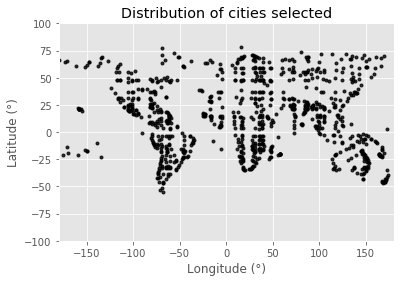

In [4]:
#Assess and clean data if necessary 
city_list_df=city_list_df.dropna(how='any')
print(len(city_list_df))
city_list_df.count()
city_list_df.to_csv("city_list_df.csv")

# Visually check distribution of lat/lngs
plt.style.use('ggplot')
plt.scatter(city_list_df["Lng"], 
            city_list_df["Lat"],color="black", linewidths=1,marker=".", alpha=0.8)     
plt.title("Distribution of cities selected")
plt.ylabel("Latitude (\xb0)")
plt.xlabel("Longitude (\xb0)")
plt.xlim([-180,180])
plt.ylim([-100,100])
plt.show()

# Scatter plots for each data type

## Temperature (F) vs. Latitude Plot

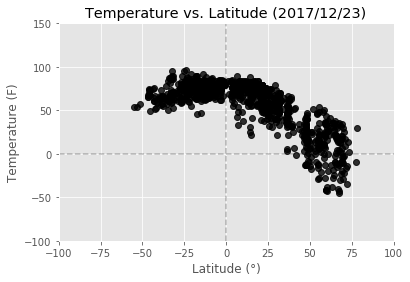

In [5]:
#Create Temperature vs. Latitude scatterplot
plt.scatter(city_list_df["Lat"], 
            city_list_df["Temperature (F)"],
            color="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Temperature vs. Latitude" + " "+ "(" + datetime.now().strftime('%Y/%m/%d') + ")")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude (\xb0)")
plt.hlines(0, -100, 100, alpha=0.25, linestyle='dashed')
plt.vlines(0, -100, 150, alpha=0.25, linestyle='dashed')
plt.grid(True)
plt.xlim([-100,100])
plt.ylim([-100,150])
plt.savefig("Temperature_vs_Latitude.png")
plt.show()

## Humidity(%) vs. Latitude Plot

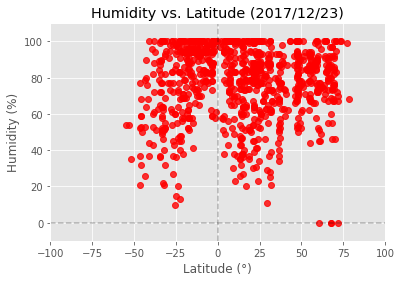

In [6]:
#Create Humidity vs. Latitude scatterplot
current_time = datetime.now().strftime('%Y-%m-%d')
plt.scatter(city_list_df["Lat"], 
            city_list_df["Humidity (%)"],
            color="red", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Humidity vs. Latitude" + " "+ "(" + datetime.now().strftime('%Y/%m/%d') + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (\xb0)")
plt.hlines(0, -100, 100, alpha=0.25, linestyle='dashed')
plt.vlines(0, -10, 110, alpha=0.25, linestyle='dashed')
plt.grid(True)
plt.xlim([-100,100])
plt.ylim([-10, 110])
plt.savefig("Humidity_vs_Latitude.png")
plt.show()

## Cloudiness (%) vs. Latitude Plot

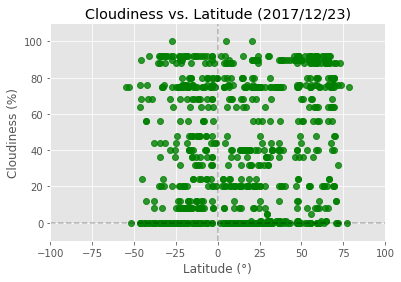

In [7]:
#Create Cloudiness vs. Latitude scatterplot
plt.scatter(city_list_df["Lat"], 
            city_list_df["Cloudiness (%)"],
            color="green", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Cloudiness vs. Latitude" + " "+ "(" + datetime.now().strftime('%Y/%m/%d') + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (\xb0)")
plt.hlines(0, -100, 100, alpha=0.25, linestyle='dashed')
plt.vlines(0, -10, 110, alpha=0.25, linestyle='dashed')
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-10, 110])
plt.savefig("Cloudiness_vs_Latitude.png")
plt.show()

## Wind Speed (mph) vs. Latitude Plot

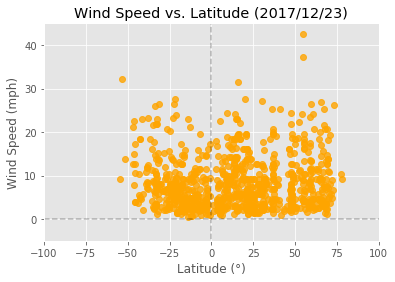

In [8]:
#Create Speed vs. Latitude scatterplot
plt.scatter(city_list_df["Lat"], 
            city_list_df["Wind Speed (mph)"],
            color="orange", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Wind Speed vs. Latitude" + " "+ "(" + datetime.now().strftime('%Y/%m/%d') + ")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (\xb0)")
plt.hlines(0, -100, 100, alpha=0.25, linestyle='dashed')
plt.vlines(0, -10, 45, alpha=0.25, linestyle='dashed')
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-5, 45])
plt.savefig("WindSpeed_vs_Latitude.png")
plt.show()